In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scipy as spy
from IPython.display import Image
import csv
from copy import deepcopy

from sklearn.decomposition import PCA, KernelPCA


#*********************************************************************************
from sklearn.neighbors import KNeighborsClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
#Import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import precision_recall_fscore_support
import sklearn.metrics as smet
#from xgboost import XGBClassifier
#from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
#*****************************************************************************************
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
pd.set_option('display.max_columns', 100)
print(os.getcwd())
os.listdir()

C:\Users\rudol\Programming\RCS\Gala darbs\Alternativa


['.ipynb_checkpoints',
 'heart diseases.csv',
 'heart.csv',
 'Nosleguma darbs RCS.ipynb',
 'Prezentacija_R_E.pptx',
 'test_log.txt']

<h1>Datu tabulas izveidošana<h1>

In [3]:
#### Izveidojam DF
df_BaseTable0 = pd.read_csv("heart diseases.csv")

In [4]:
df_BaseTable0.shape

(918, 12)

In [5]:
df_BaseTable0.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


<h1>Datu tīrīšana<h1>

In [6]:
df_BaseTable1 = df_BaseTable0.copy()

In [7]:
df_BaseTable1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df_BaseTable1.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

<h1>Datu atlasīšana<h1>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

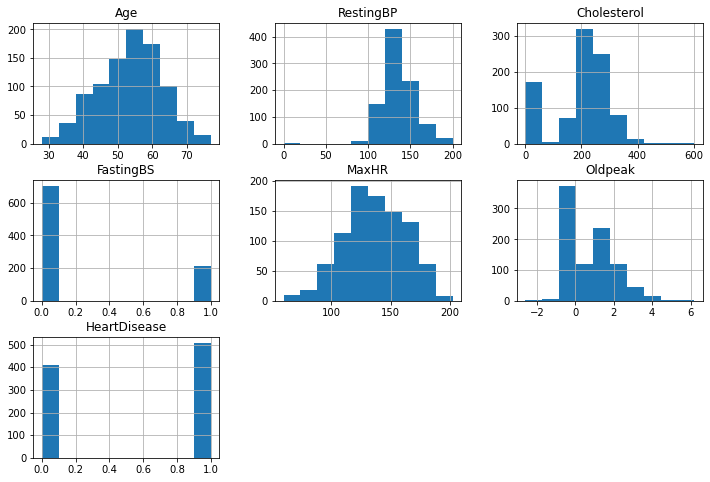

In [9]:
df_BaseTable1.hist(figsize=(12,8))

In [10]:
# df_BaseTable1[["Cholesterol"]].hist()
df_BaseTable1[df_BaseTable1["Cholesterol"] < 100]["Cholesterol"].sort_values(ascending=False)
# very low if it is less than 40 milligrams per deciliter

98     85
411     0
403     0
404     0
405     0
       ..
351     0
352     0
353     0
354     0
536     0
Name: Cholesterol, Length: 173, dtype: int64

In [11]:
df_BaseTable1[(df_BaseTable1["RestingBP"] == 0) | (df_BaseTable1["Cholesterol"] == 0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [12]:
df_BaseTable2 = df_BaseTable1.copy()

In [13]:
df_BaseTable2 = df_BaseTable2.drop(df_BaseTable2[(df_BaseTable2["RestingBP"] == 0)].index)

In [14]:
# # nomainu uz vidējajām vērībām
# mean_chol = df_BaseTable2[df_BaseTable2["Cholesterol"] != 0]["Cholesterol"].mean()
# df_BaseTable2["Cholesterol"] = df_BaseTable2["Cholesterol"].replace(0, mean_chol)
# df_BaseTable2[["Cholesterol"]].hist()

In [15]:
# # nomainu uz mediānas vērībām
# median_chol = df_BaseTable2[df_BaseTable2["Cholesterol"] != 0]["Cholesterol"].median()
# df_BaseTable2["Cholesterol"] = df_BaseTable2["Cholesterol"].replace(0, median_chol)
# df_BaseTable2[["Cholesterol"]].hist()

In [16]:
filter0 = df_BaseTable2["Cholesterol"] != 0
# filter0
df_BaseTable2 = df_BaseTable2[filter0]

In [17]:
# df_BaseTable2[df_BaseTable2["Cholesterol"] > 400].count()

In [18]:
# df_BaseTable2[df_BaseTable2["Cholesterol"] < 400][["Cholesterol"]].boxplot()

In [19]:
# df_BaseTable2 = df_BaseTable2.drop(df_BaseTable2[(df_BaseTable2["Cholesterol"] > 400)].index)
# df_BaseTable2

In [20]:
df_BaseTable3 = df_BaseTable2.copy()
df_BaseTable3.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [21]:
df_BaseTable3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting systolic blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [22]:
df_get_dummies0 = pd.get_dummies(df_BaseTable3[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]], 
                                 drop_first=True)
df_get_dummies0.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1


In [23]:
df_BaseTable3_temp = df_BaseTable3.copy()
df_BaseTable4 = pd.concat([df_BaseTable3_temp, df_get_dummies0], axis=1)
df_BaseTable4 = df_BaseTable4.drop(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], axis=1)
df_BaseTable4.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [24]:
# df_BaseTable4 = df_BaseTable4.drop(columns=["ST_Slope_Flat"], axis=1)

In [25]:
df_Target1 = df_BaseTable4[['HeartDisease']]
df_Features1 = df_BaseTable4.drop(columns = ['HeartDisease', "ST_Slope_Flat", "ST_Slope_Up", "RestingECG_Normal"], axis =1)
df_Features1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_ST,ExerciseAngina_Y
0,40,140,289,0,172,0.0,1,1,0,0,0,0
1,49,160,180,0,156,1.0,0,0,1,0,0,0
2,37,130,283,0,98,0.0,1,1,0,0,1,0
3,48,138,214,0,108,1.5,0,0,0,0,0,1
4,54,150,195,0,122,0.0,1,0,1,0,0,0


(12.0, 0.0)

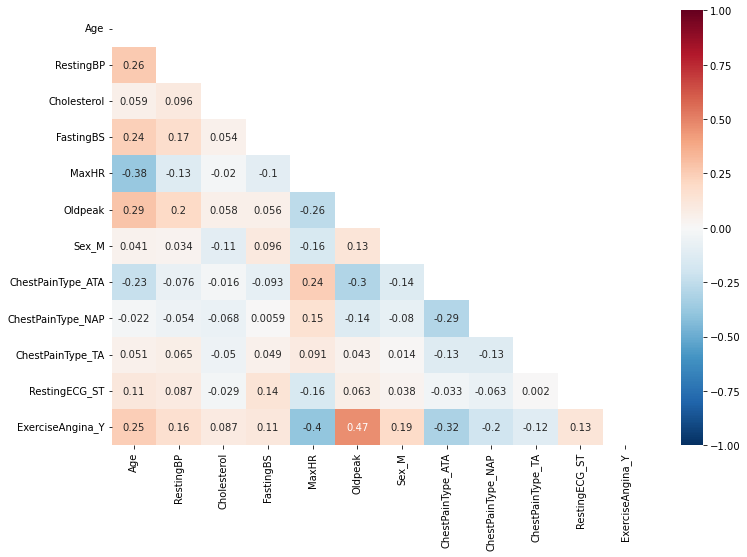

In [26]:
# Create  correlation matrix PEARSON
corr = df_Features1.corr()

# Create mask
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_mask = corr.mask(mask)

f, ax = plt.subplots(figsize=(12, 8))

fig2 = sns.heatmap(corr_mask,cmap='RdBu_r',vmin=-1,vmax=1, annot = True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

<AxesSubplot:>

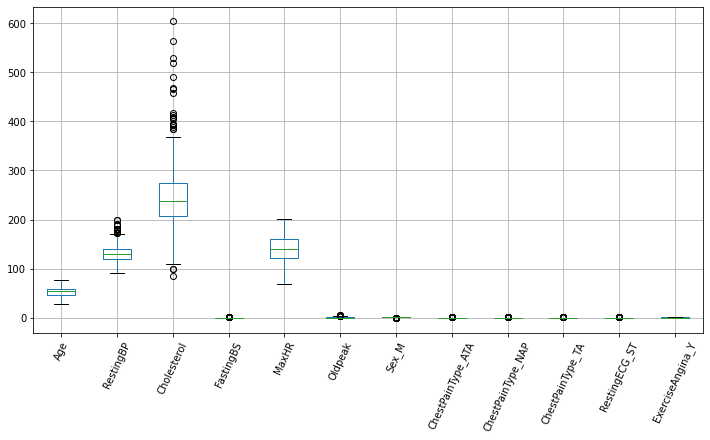

In [27]:
df_Features1.boxplot(rot = 65, figsize=(12,6))

Standartizēt

In [28]:
scaler = StandardScaler()
mat_X_scaled = scaler.fit_transform(df_Features1).copy()
type(mat_X_scaled)

numpy.ndarray

<AxesSubplot:>

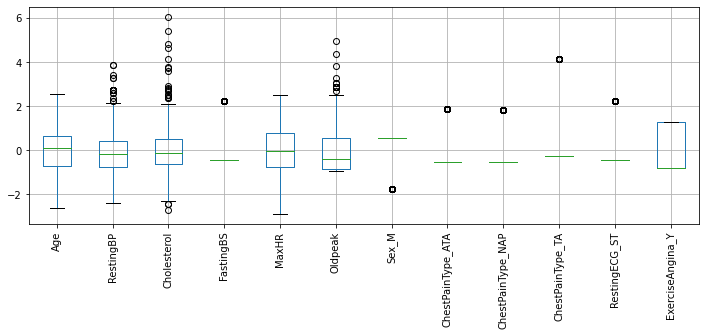

In [29]:
df_X_scaled = pd.DataFrame(mat_X_scaled, columns =df_Features1.columns)
df_X_scaled.boxplot(rot=90, figsize=(12,4))

<h1>Apmācam modeli<h1>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, 
                                                    df_Target1, 
                                                    test_size=0.25, 
                                                    stratify= df_Target1, 
                                                    random_state=1)

In [31]:
# solver, start_num, end_num -> dict{num: [st_nobide]}
def make_clf_in_range(start, end):
    clf_data_dic = {}
    for num in np.arange(start, end):
        clf1 = LogisticRegression(solver='saga', C = 0.0001, penalty = "l2", max_iter=2000, random_state=10,
                                 class_weight = 'balanced',fit_intercept=True)
        clf2 = RandomForestClassifier(n_estimators=num+10, random_state=1)
        clf3 = KNN(num)

        eclf1 = VotingClassifier(estimators=[('lr', clf1), 
                                         ('rf', clf2), 
                                         ('knn', clf3)], voting='hard')

        eclf1 = eclf1.fit(X_train,np.ravel(y_train))
        y_pred = eclf1.predict(X_test)

        confus_matrix = smet.confusion_matrix(y_test, y_pred)
        TN = confus_matrix[0,0]
        FP = confus_matrix[0,1]
        FN = confus_matrix[1,0]
        TP = confus_matrix[1,1]

        Accuracy = (TP + TN)/(TP +FP +FN +TN)

        TPR_sensitivity = TP/(TP +FN)
        FPR = FP/(TN +FP)
        FNR_missRate = FN/(TP + FN)

        fallout, sensitivity, thresholds = smet.roc_curve(y_test, y_pred)
        t_dict= {"fallout": fallout,
                 "sensitivity": sensitivity,
                 "thresholds": thresholds}
        df_fall_sens_thres = pd.DataFrame(t_dict)

        auc = smet.auc(fallout,sensitivity)
        
        score = cross_validate(eclf1, X_train, np.ravel(y_train), cv=5)
        score_std = score["test_score"].std()
        
        
        clf_data_dic[num] = [Accuracy, auc, FNR_missRate, FPR, score_std]
    return clf_data_dic

In [32]:
clf_data = make_clf_in_range(5,26)


In [33]:
df_clf_values = pd.DataFrame(clf_data)

In [34]:
df_clf_values = df_clf_values.transpose()

In [35]:
df_clf_values.columns = ["Accuracy", "Area_under_curve", "False_negative_rate", "False_positive_rate", "Cross_val_STD", ]

In [36]:
df_clf_values.head(10)

,Accuracy,Area_under_curve,False_negative_rate,False_positive_rate,Cross_val_STD
5,0.802139,0.802970,0.179775,0.214286,0.036867
6,0.812834,0.812658,0.191011,0.183673,0.039603
7,0.802139,0.802970,0.179775,0.214286,0.046614
8,0.812834,0.812658,0.191011,0.183673,0.049588
9,0.812834,0.813174,0.179775,0.193878,0.046288
10,0.807487,0.807040,0.202247,0.183673,0.041408
11,0.796791,0.796836,0.202247,0.204082,0.040560
12,0.802139,0.801422,0.213483,0.183673,0.043218
13,0.812834,0.812658,0.191011,0.183673,0.042337
14,0.818182,0.817760,0.191011,0.173469,0.038209


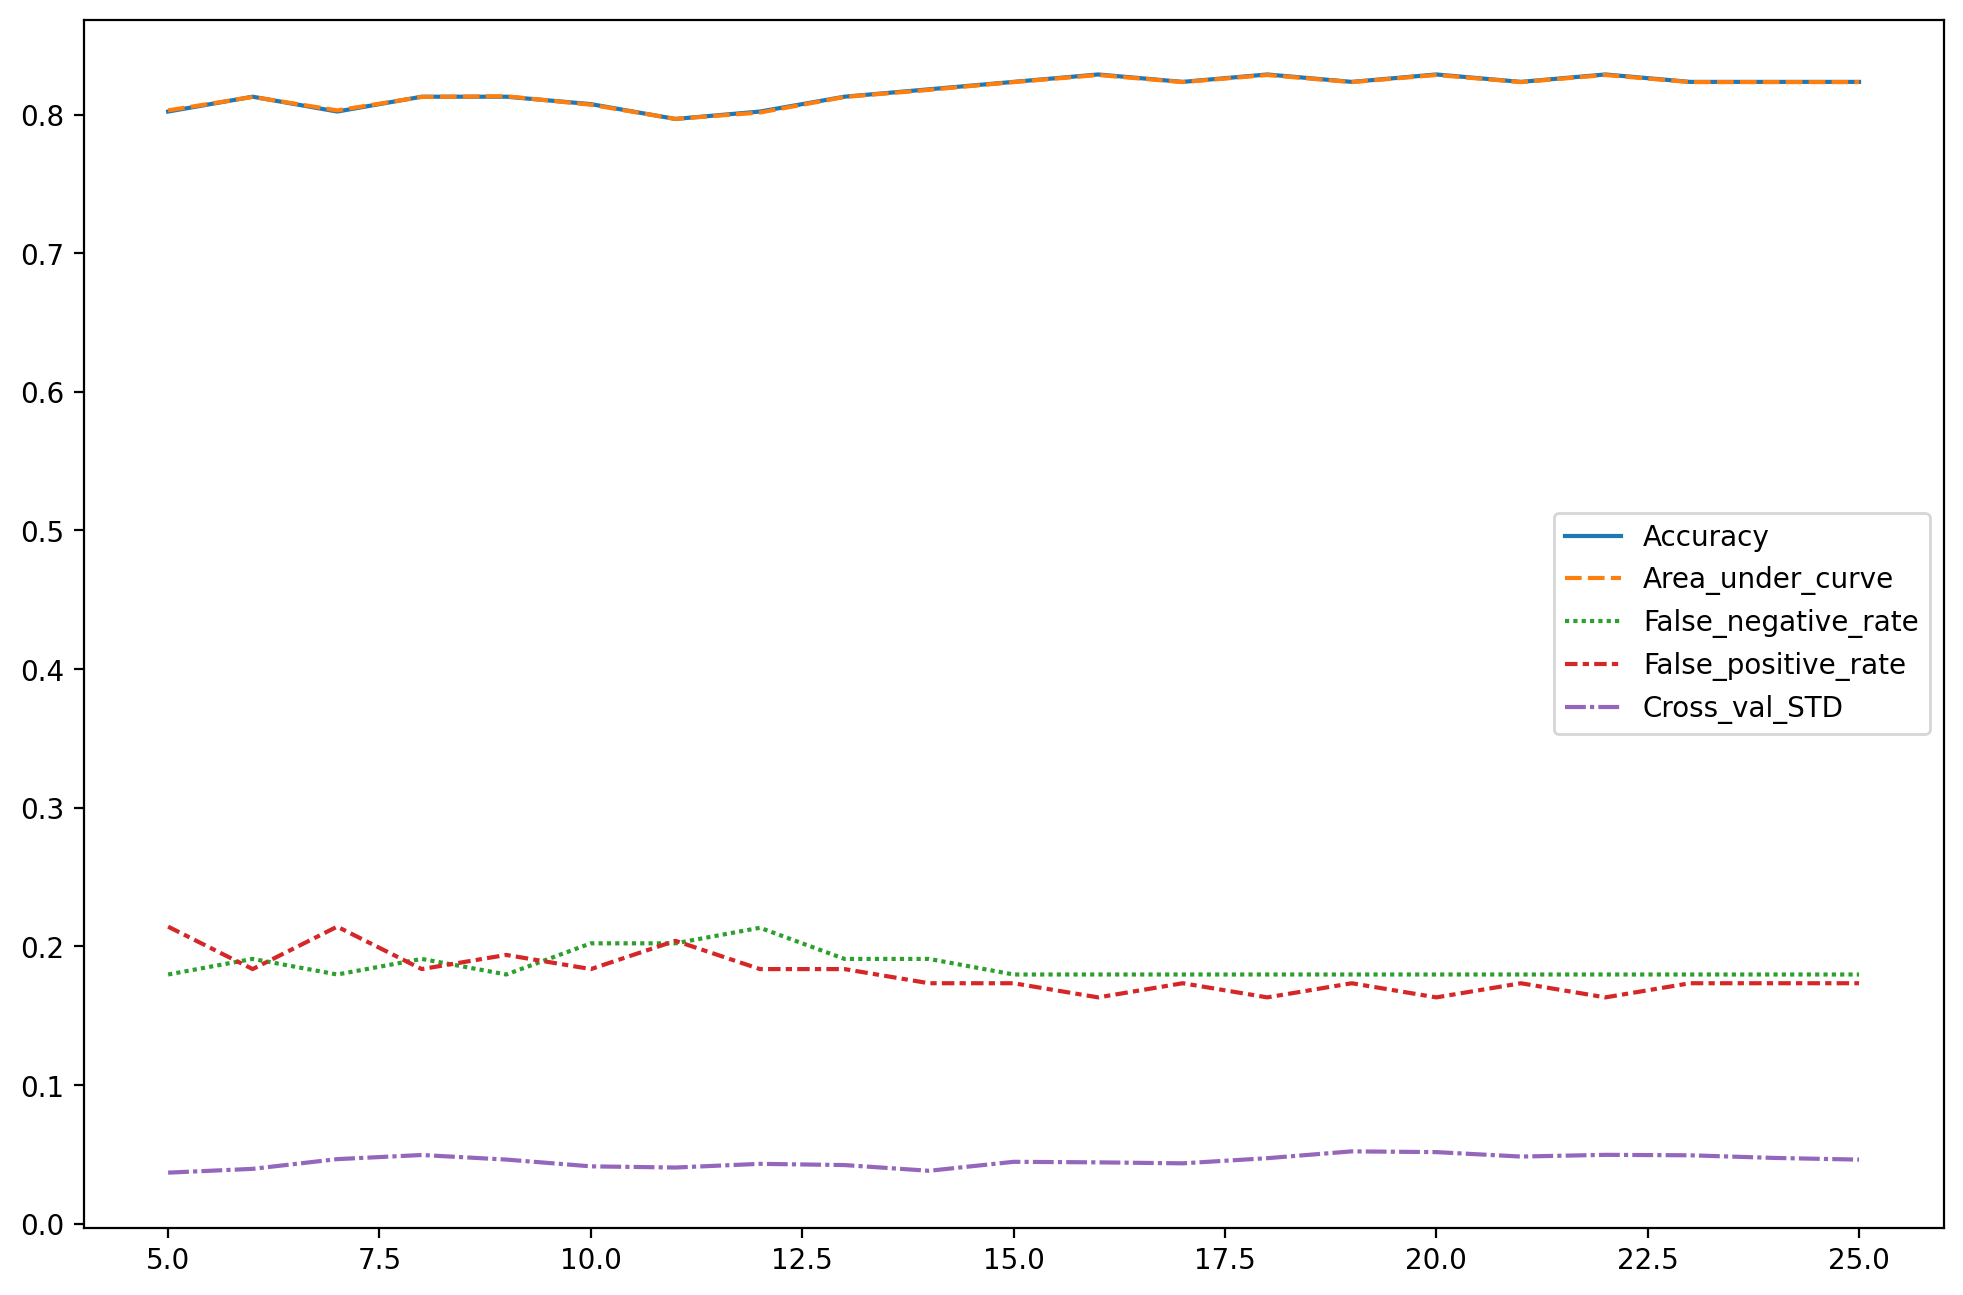

In [37]:
plt.figure(figsize=(12,8), dpi=200)
sns.lineplot(data=df_clf_values)
plt.xticks()
plt.show()

Manuālā metodē

In [38]:
clf1 = LogisticRegression(solver='saga', C = 0.0001, penalty = "l2", max_iter=2000, random_state=10,
                             class_weight = 'balanced',fit_intercept=True)
# clf2 = RandomForestClassifier(n_estimators=25, random_state=1)
# clf3 = KNN(5)

# eclf1 = VotingClassifier(estimators=[('lr', clf1), 
#                                      ('rf', clf2), 
#                                      ('knn', clf3)], voting='hard')
# # eclf1 = VotingClassifier(estimators=[ 
# #                                      ('knn', clf3) 
# #                                      ], voting='hard')
clf1 = clf1.fit(X_train,np.ravel(y_train))
y_pred = clf1.predict(X_test)

In [39]:
#class_weight = {0: 1,
#              1: 1} 
#"balanced"
#solver='lbfgs'
#solver='saga'

#Regularizcija ar lasso penelaty = l2, neatauj kādam parametram būt parāk nozīmīgam
# ja penelaty = l1, tad maznozīmīgie koeficienti paliek  0.015
# clf1 = LogisticRegression(solver='saga', C = 0.0001, penalty = "l2", max_iter=2000, random_state=10,
#                              class_weight = 'balanced',fit_intercept=True)
# clf1.fit(X_train,np.ravel(y_train)) 
#clf2.intercept_
#y_test ir pareizās vērtības
#y_pred prognozētās vērtības
# y_pred = clf1.predict(X_test)

In [40]:
confus_matrix = smet.confusion_matrix(y_test, y_pred)
TN = confus_matrix[0,0]
FP = confus_matrix[0,1]
FN = confus_matrix[1,0]
TP = confus_matrix[1,1]

Accuracy = (TP + TN)/(TP +FP +FN +TN)

TPR_sensitivity = TP/(TP +FN)
FPR = FP/(TN +FP)
FNR_missRate = FN/(TP + FN)

fallout, sensitivity, thresholds = smet.roc_curve(y_test, y_pred)
t_dict= {"fallout": fallout,
         "sensitivity": sensitivity,
         "thresholds": thresholds}
df_fall_sens_thres = pd.DataFrame(t_dict)

auc = smet.auc(fallout,sensitivity)


print("Accuracy"," " ,Accuracy)
print("auc"," ",auc)
print("FNR_missRate"," ",FNR_missRate)
print("FPR"," ",FPR)

Accuracy   0.8074866310160428
auc   0.8080715432240312
FNR_missRate   0.1797752808988764
FPR   0.20408163265306123


In [41]:
score = cross_validate(clf1, X_train, np.ravel(y_train), cv=5)

In [42]:
# score_str = " ".join(list(score["test_score"].astype(str)))
score["test_score"].std()

0.04063551799618999

In [43]:
# with open("test_log.txt", "a", encoding="utf-8-sig") as test:
#     test.write(f"""     ____________________________
#                 |Noņemts nederīgais, voting classifier, soft all
#                     Accuracy = {Accuracy}
#                     Area under curve = {auc}
#                     False negative rate = {FNR_missRate}
#                     False positive rate = {FPR}
#                     Cross validation = {score_str}
#                     """)

Text(0.5, 1.0, 'Neatkarīgo mainīgo ietekme modelī')

<Figure size 432x288 with 0 Axes>

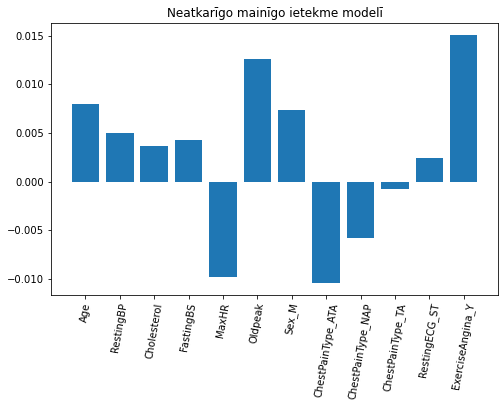

In [44]:
feature_names = df_Features1.columns.values
coef= clf1.coef_[0]

plt.figure(30)
plt.figure(figsize=(8,5))

plt.bar(feature_names,coef)
plt.xticks(feature_names, rotation=80)
plt.title("Neatkarīgo mainīgo ietekme modelī")